In [1]:
%load_ext autoreload
%autoreload 2

In [55]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import trange

from visual_taxis import NMFVisualTaxis, MovingObjArena
from flygym.envs.nmf_mujoco import MuJoCoParameters
import flygym.util.vision as vision

In [56]:
arena = MovingObjArena(obj_spawn_pos=(5, 3, 0), move_mode="s_shape")
sim_params = MuJoCoParameters(render_playspeed=0.2, render_camera="Animat/camera_top_zoomout", render_raw_vision=True)
# sim_params = MuJoCoParameters(render_playspeed=0.2, render_raw_vision=True)
sim = NMFVisualTaxis(
    sim_params=sim_params,
    arena=arena,
    decision_dt=0.05,
    n_stabilisation_steps=5000,
    obj_threshold=50,
)

In [57]:
obs_hist = []
visual_hist = []
for i in trange(100):
    obs, rew, term, trunc, info = sim.step(np.array([0, 0]))
    sim.render()
    obs_hist.append(obs)
    visual_hist.append(sim.curr_raw_visual_input)
obs_hist = np.array(obs_hist)
sim.save_video("test.mp4")

100%|██████████| 100/100 [01:38<00:00,  1.02it/s]


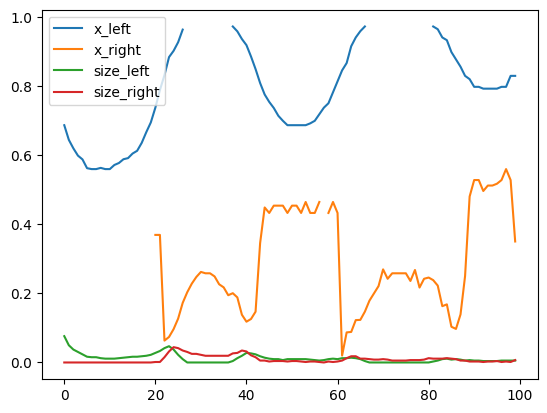

In [58]:
plt.plot(obs_hist[:, 1], label="x_left")
plt.plot(obs_hist[:, 4], label="x_right")
# plt.plot(obs_hist[:, 0], label="y_left")
# plt.plot(obs_hist[:, 3], label="y_right")
plt.plot(obs_hist[:, 2], label="size_left")
plt.plot(obs_hist[:, 5], label="size_right")
plt.legend()

In [7]:
readouts_per_eye = vision.raw_image_to_hex_pxls(
    np.ascontiguousarray(sim.curr_raw_visual_input[0]), vision.num_pixels_per_ommatidia, vision.ommatidia_id_map
)

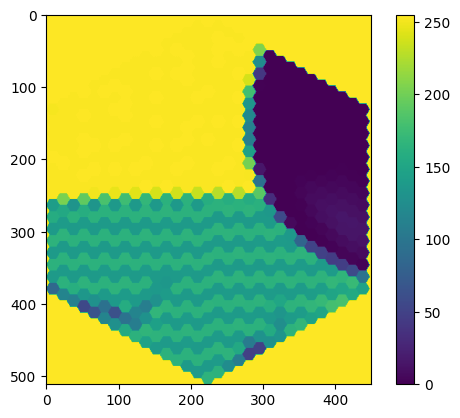

In [19]:
hr = vision.hex_pxls_to_human_readable(readouts_per_eye, vision.ommatidia_id_map)
plt.imshow(hr)
plt.colorbar()

In [32]:
(sim._get_visual_features()[:2] / 2 + 0.5) * np.array(vision.ommatidia_id_map.shape)

array([202.11720172, 369.65045229])

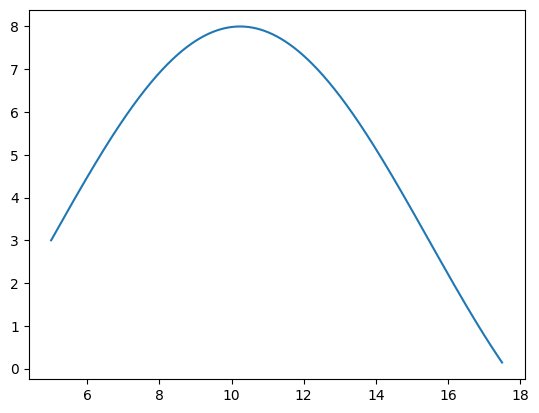

In [133]:
plt.plot(sim.arena.obj_pos_history[:, 1], sim.arena.obj_pos_history[:, 2])

In [61]:
sim._last_render_time

1.247899999999879

In [62]:
sim.curr_time

1.2499999999998788

In [63]:
sim._eff_render_interval

0.0033333333333333335

In [64]:
sim.arena.ball_pos

array([-649.6166501 ,   48.11933309,    2.        ])

In [66]:
sim.physics.named

NamedIndexStructs(model=<dm_control.mujoco.index.make_struct_indexer.<locals>.StructIndexer object at 0x7f8a730940e0>, data=<dm_control.mujoco.index.make_struct_indexer.<locals>.StructIndexer object at 0x7f8a75a4b360>)